<a href="https://colab.research.google.com/github/safwanshamsir99/Rice-Grain-Classifier/blob/main/ricegrain_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

##Background

Food security has become the main concern worldwide. The Committee on Food Security (CFS) under United Nations (UN) explained that food security is important for all people that have physical, social, and economic access to ample, safe, and nutritious food that meets their food preferences and dietary needs for an effective and healthy life. The definition of food security is further described by the UN Food and Agriculture Organization (FAO) where food security can be categorized into four dimensions, availability, access, utilization, and stability. In the context of availability, the food must be in sufficient quantities of appropriate quality, supplied in both domestic production and imports. With access, everyone can get adequate resources for acquiring appropriate foods for a nutritious diet. For utilization, food through adequate diet, clean water, sanitation, and healthcare is crucial to reach a state of nutritional well-being whereby all physiological needs are met. Finally, stability is where a household or individual must always have access to adequate food. Importantly, everyone should not risk losing access to food because of sudden shocks such as economic or climatic crises and cyclical events such as seasonal food insecurity (​Nordin et al., 2022)​.

In addition, addressing the issue of rice fraud is crucial given the global concern over food security. The Committee on Food Security (CFS) under United Nations (UN) has emphasized the importance of safe and nutritious food for all individuals, which includes the authenticity and quality of food products such as rice. The establishment of regulations and standards by organizations such as the International Rice Research Institute (IRRI) and British Retail Consortium (BRC) is necessary to ensure food security and protect consumers from fraudulent practices in the global rice trade. However, divergences between and within legislation in different countries cause problems in enforcing the regulations. The most generic form of rice fraud involves the mislabelling of Indian and Pakistan Basmati with cheaper non-aromatic indicia long-grain rice. Additionally, artificial flavours may be added to mask the use of non-flavoured rice varieties. The issue of rice fraud also extends to dilution by lower quality rice and the addition of carcinogenic substances. In some developing countries, government subsidies and quotas lead to illegal trading and smuggling ​(Pradana-López et al., 2021)​. To determine the authenticity of rice, extensive studies have been conducted on botanical and geographical origin and management practices, specifically organic rice. The goal is to protect customers against mislabelling of food through the establishment of regulations and standards.

At the moment, advancements in technology have led to the development of new tools for rice quality control and fraud detection. One such tool is the use of image analysis and machine learning techniques to analyse images of rice grains and identify any adulteration or mislabelling. By training machine learning models on large datasets of images of authentic rice varieties, it becomes possible to automatically detect any inconsistencies or anomalies in the appearance of rice grains. This can help identify cases of mislabelling or adulteration, allowing for swift action to be taken to prevent fraudulent practices. Furthermore, machine learning models can also be trained to detect variations in the chemical composition of rice grains, which can be indicative of quality or authenticity issues. This can be especially useful in identifying instances of dilution or contamination of premium rice varieties.

##Problem Statement



##Objectives

The main aim of this research is to classify rice varieties based on the types and quality using machine learning algorithms for rice fraudulent detection purposes. To fulfil the aim of this study, the following objectives are outlined:

1. To determine the best machine learning algorithms to classify rice varieties based on the types.

2. To identify rice quality using image processing techniques.

3. To develop a mobile application prototype based on the best machine learning algorithms for rice fraud detection.

#Libraries and Packages

In [ ]:
# Install the Kaggle API in your Google Colab notebook using the following command:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.random import set_seed
from tensorflow.keras.utils import load_img, img_to_array

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

import random
import cv2

from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np


# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

from sklearn.linear_model import LogisticRegression

In [ ]:
random.seed(42)

#Data Collection

The rice image dataset is provided courtesy of Kaggle user MURAT KOKLU under a CC0 Public Domain license. https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset. In the featured notebook, the dataset is downloaded directly from the dataset contributor's website. Details of this and other datasets can be found here: https://www.muratkoklu.com/datasets/

The Rice Image Dataset is a collection of images of five different varieties of rice that are commonly grown in Turkey, namely Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The dataset contains a total of 75,000 grain images, with 15,000 images for each rice variety. In addition to the images, the dataset also includes a second dataset containing 106 features extracted from the images, which include 12 morphological, 4 shape, and 90 color features.  

The dataset's objective is to train a classification model that can accurately identify the five distinct types of rice based on their visual characteristics such as texture, shape, and color. This task is significant in the food industry as it allows for the identification and quality assessment of different rice types, ensuring that the right type of rice. The dataset's classification model could be used to evaluate and grade rice before shipment, allowing producers to identify any quality issues before shipping the goods. This process can reduce manual inspection time and improve the efficiency of the paddy production process.

In [ ]:
# Set the Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = "intanqamarina" # username from the Kaggle API json file
os.environ['KAGGLE_KEY'] = "1afea1e94e322ca1783a5c33d8f89628" # key from the Kaggle API json file

In [ ]:
# Use the following command to download the dataset to Google Colab notebook:
# This will download the rice-image-dataset.zip file to Google Colab notebook.

!kaggle datasets download -d muratkokludataset/rice-image-dataset

 99% 218M/219M [00:07<00:00, 36.0MB/s]
100% 219M/219M [00:07<00:00, 31.7MB/s]


In [ ]:
# This will extract the contents of the rice-image-dataset.zip file to current working directory.

!unzip -q rice-image-dataset.zip

In [ ]:
os.remove("/content/Rice_Image_Dataset/Rice_Citation_Request.txt")

#Exploratory Data Analysis (EDA)


In [ ]:
PTH = "/content/Rice_Image_Dataset"

for pth, _, files in os.walk(PTH):
    n_img = sum(1 for file in files if file.endswith(".jpg"))
    if n_img:
        print(f"{n_img:,} images are found in '{pth}'.")

In [ ]:
!pip install diagnostics

In [ ]:
from PIL import Image
from dask.bag import from_sequence
from dask.diagnostics import ProgressBar

In [ ]:
directories = {'Class_0': '/content/Rice_Image_Dataset/Karacadag/',
'Class_1': '/content/Rice_Image_Dataset/Basmati/',
'Class_2': '/content/Rice_Image_Dataset/Arborio/',
'Class_3': '/content/Rice_Image_Dataset/Jasmine/',
'Class_4': '/content/Rice_Image_Dataset/Ipsala/'}

def get_dims(file):
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

[########################################] | 100% Completed | 16.23 s
[########################################] | 100% Completed | 15.28 s
[########################################] | 100% Completed | 15.24 s
[########################################] | 100% Completed | 17.03 s
[########################################] | 100% Completed | 15.70 s


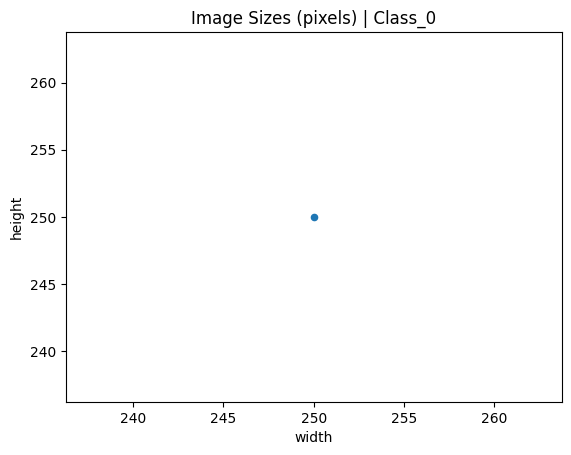

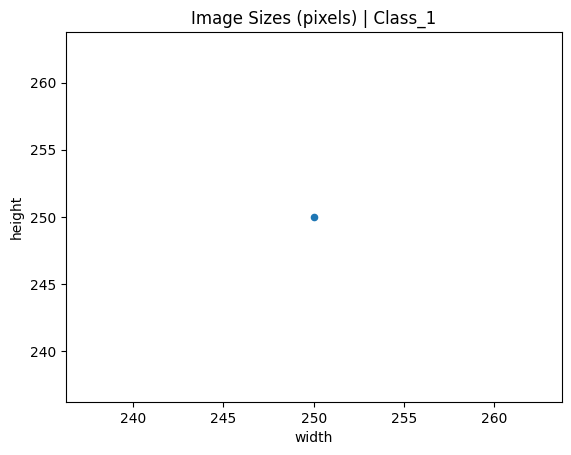

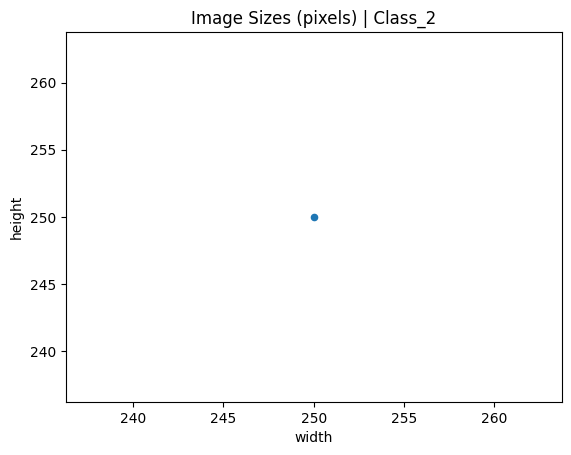

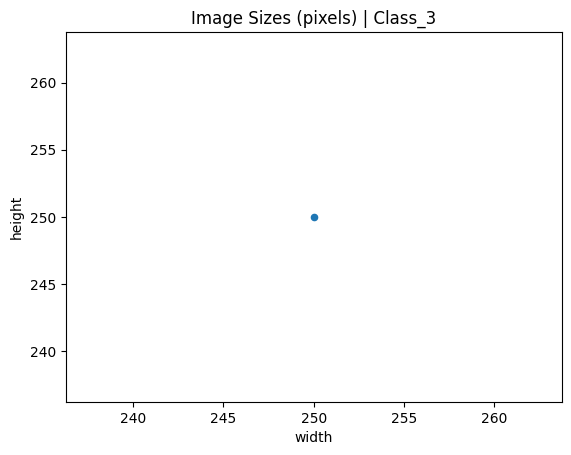

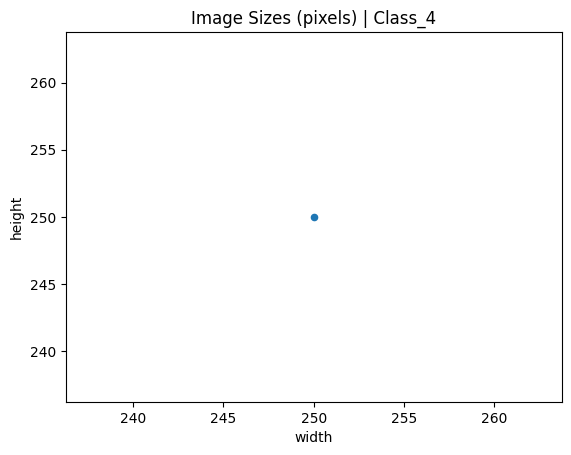

In [ ]:
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = from_sequence(filelist).map(get_dims)
  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

# Building and Train the RiceSure Combined Model

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 42

results = [] ## this variable will contain all the models accuracies

In [ ]:
def plot_loss_curves(hist, init_epochs=0):
    h_line = [init_epochs-1, init_epochs-1]

    plt.figure(figsize=(6, 6))
    plt.subplot(2, 1, 1)
    plt.plot(hist["loss"], label="Loss (train)")
    plt.plot(hist["val_loss"], label="Loss (test)")
    if init_epochs:
        plt.plot(h_line, [0, max(plt.ylim())], label='Start fine-tuning')
    plt.legend(loc="upper right")
    plt.ylabel("Cross Entropy")
    plt.ylim([0, max(plt.ylim())])
    plt.title("Loss History")

    plt.figure(figsize=(6, 6))
    plt.subplot(2, 1, 2)
    plt.plot(hist["accuracy"], label="Accuracy (train)")
    plt.plot(hist["val_accuracy"], label="Accuracy (test)")
    if init_epochs:
        plt.plot(h_line, [min(plt.ylim()), 1], label='Start fine-tuning')
    plt.legend(loc="lower right")
    plt.ylabel("Accuracy")
    plt.ylim([min(plt.ylim()), 1])
    plt.xlabel("Epoch")
    plt.title("Accuracy History")

    return None

In [ ]:
def get_prediction(model, data):
    img_pth = [PTH+"/"+file for file in data.filenames]
    lbl = list(data.class_indices.keys())
    y = data.classes
    y_pr = model.predict(data)
    y_hat = np.argmax(y_pr, axis=1)

    return img_pth, lbl, y, y_pr, y_hat

In [ ]:
def show_classification_summary(y, y_hat, lbl):
    smy = classification_report(y, y_hat, target_names=lbl)
    print(smy)

    return None

In [ ]:
def show_confusion_matrix(y, y_hat, lbl):
    lbl_map = {v: k for v, k in enumerate(lbl)}
    cm = pd.crosstab(
            pd.Series(y, name="actual").map(lbl_map),
            pd.Series(y_hat, name="predicted").map(lbl_map),
        ).style \
            .background_gradient("binary") \
            .set_properties(**{"width": "8em", "text-align": "center"}) \
            .set_table_styles([dict(selector="th",props=[("text-align", "center")])])
    display(cm)

    return None

In [ ]:
def get_image(pth, img_size=IMG_SIZE):
    img = load_img(pth, target_size=img_size)
    img = img_to_array(img) / 255.

    return img

In [ ]:
def view_random_predictions(title, pth, nr=2, nc=3, seed=SEED):
    set_seed(seed)
    smp = np.random.choice(range(len(y)), nr*nc, False)

    plt.figure(figsize=(6, 3))
    for pos, idx in enumerate(smp):
        img = get_image(pth[idx])
        yi = lbl[y[idx]]
        yi_hat = lbl[y_hat[idx]]
        yi_pr = y_pr[idx].max()
        tit_sub = f"Actual: {yi}\nPrediction: {yi_hat} ({yi_pr:.1%})"
        col = ["red", "green"][yi_hat == yi]

        ax = plt.subplot(nr, nc, pos+1)
        plt.imshow(img, cmap="binary")
        plt.title(tit_sub, fontsize=8, color=col)
        plt.axis("off")

    plt.suptitle(title, fontsize=12)
    plt.tight_layout()

    return None

In [ ]:
def view_random_false_predictions(title, pth, nr=2, nc=3, seed=SEED):
    set_seed(seed)

    idx_fp = pd.Series(y != y_hat)[y != y_hat].index
    if len(idx_fp) == 0:
        print("All predictions are valid!")
        return None
    else:
        dim = [nr*nc, len(idx_fp)][len(idx_fp) <= nr*nc]
    smp = np.random.choice(idx_fp, dim, False)

    plt.figure(figsize=(6, 3))
    for pos, idx in enumerate(smp):
        img = get_image(img_pth[idx])
        yi = lbl[y[idx]]
        yi_hat = lbl[y_hat[idx]]
        yi_pr = y_pr[idx].max()
        tit_sub = f"Actual: {yi}\nPrediction: {yi_hat} ({yi_pr:.1%})"

        ax = plt.subplot(nr, nc, pos+1)
        plt.imshow(img, cmap="binary")
        plt.title(tit_sub, fontsize=8, color="red")
        plt.axis("off")

    plt.suptitle(title, fontsize=12)
    plt.tight_layout()

    return None

In [ ]:
# import necessary packages

def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

## Rice Variety Classification

### Traditional Machine Learning Models

####Image Processing

In [ ]:
imagePaths = getListOfFiles("/content/Rice_Image_Dataset") ## Folder structure: datasets --> sub-folders with labels name
print(imagePaths)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    data.append(img)
    c=c+1
    print(c)

#print(lables)

# encode the labels as integer
data = np.array(data)
lables = np.array(lables)

le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)

print(data.shape)
print(lables.shape)
print(dataset_size)

(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.20, random_state=42)



Streaming output truncated to the last 5000 lines.
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
70015
70016
70017
70018
70019
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
70054
70055
70056
70057
70058
70059
70060
70061
70062
70063
70064
70065
70066
70067
70068
70069
70070
70071
70072
70073
70074
70075
70076
70077
70078
70079
70080
70081
70082
70083
70084
70085
70086
70087
70088
70089
70090
70091
70092
70093
70094
70095
70096
70097
70098
70099
70100
70101
70102
70103
70104
70105
70106
70107
70108
70109
70110
70111
70112
70113
70114
70115
70116
70117
70118
70119
70120
70121
70122
70123
70124
70125
70126
70127
70128
70129
70130
70131
70132
70133
70134
70135
70136
70137
70138
70139
70140
70141
70142
70143
70144
70145
70146
70147
70148
70149
70150
70151
70152
70153
70154
70155
70156
70157
70158
70159
70160
70161
70162
7

#### Random Forest (First Model)

In [ ]:
model = RandomForestClassifier()
model.fit(trainX, trainY)
y_pred_random_forest = model.predict(testX)
print(classification_report(testY, y_pred_random_forest, target_names=le.classes_))

              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      3083
     Basmati       0.99      0.99      0.99      2995
      Ipsala       1.00      1.00      1.00      2929
     Jasmine       0.99      0.99      0.99      2996
   Karacadag       1.00      0.99      0.99      2997

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
show_confusion_matrix(testY, y_pred_random_forest, le.classes_)

predicted,Arborio,Basmati,Ipsala,Jasmine,Karacadag
actual,,,,,
Arborio,3054,0,0,17,12
Basmati,1,2971,0,23,0
Ipsala,1,0,2928,0,0
Jasmine,2,17,0,2977,0
Karacadag,37,0,0,0,2960


In [ ]:
random_forest_acc = metrics.accuracy_score(testY, y_pred_random_forest)
print(random_forest_acc)

0.9926666666666667


In [ ]:
results.append({"Model": "Random Forest", "Accuracy": random_forest_acc})

#### k-Nearest Neighbors (KNN) (Second Model)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(trainX, trainY)
y_pred_knn = model.predict(testX)
print(classification_report(testY, y_pred_knn, target_names=le.classes_))

              precision    recall  f1-score   support

     Arborio       0.98      0.95      0.97      3083
     Basmati       0.98      0.98      0.98      2995
      Ipsala       1.00      0.99      1.00      2929
     Jasmine       0.98      0.97      0.97      2996
   Karacadag       0.96      0.99      0.97      2997

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



In [ ]:
show_confusion_matrix(testY, y_pred_knn, le.classes_)

predicted,Arborio,Basmati,Ipsala,Jasmine,Karacadag
actual,,,,,
Arborio,2942,0,0,9,132
Basmati,1,2942,0,52,0
Ipsala,13,0,2904,12,0
Jasmine,7,68,2,2919,0
Karacadag,38,0,0,0,2959


In [ ]:
knn_acc = metrics.accuracy_score(testY, y_pred_knn)
print(knn_acc)

0.9777333333333333


In [ ]:
results.append({"Model": "KNN", "Accuracy": knn_acc})

#### Logistic Regression (Third Model)

In [ ]:
model = LogisticRegression()
model.fit(trainX, trainY)
y_pred_logistic_regression = model.predict(testX)
print(classification_report(testY, y_pred_logistic_regression, target_names=le.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      3083
     Basmati       0.99      0.99      0.99      2995
      Ipsala       1.00      1.00      1.00      2929
     Jasmine       0.99      0.99      0.99      2996
   Karacadag       0.99      0.99      0.99      2997

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
show_confusion_matrix(testY, y_pred_logistic_regression, le.classes_)

predicted,Arborio,Basmati,Ipsala,Jasmine,Karacadag
actual,,,,,
Arborio,3048,0,4,5,26
Basmati,0,2955,0,40,0
Ipsala,4,4,2921,0,0
Jasmine,9,31,0,2956,0
Karacadag,22,0,0,0,2975


In [ ]:
logistic_regression_acc = metrics.accuracy_score(testY, y_pred_logistic_regression)
print(logistic_regression_acc)

0.9903333333333333


In [ ]:
results.append({"Model": "Logistic Regression", "Accuracy": logistic_regression_acc})

In [ ]:
results

[{'Model': 'Random Forest', 'Accuracy': 0.9926666666666667},
 {'Model': 'KNN', 'Accuracy': 0.9777333333333333},
 {'Model': 'Logistic Regression', 'Accuracy': 0.9903333333333333}]

In [ ]:
ml_acc_df = pd.DataFrame(results)
ml_acc_df.to_excel("ml_acc.xlsx")

### Deep learning

####Image Processing

In [ ]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, ### Divided the dataset to train (80%) and test (20%)
)

data_train = img_gen.flow_from_directory(
    directory=PTH,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode="categorical",
    subset="training",
    seed=SEED,
)

data_test = img_gen.flow_from_directory(
    directory=PTH,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=SEED,
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


#### Basic CNN (Forth Model)

In [ ]:
# Create our model (a clone of model_8, except to be multi-class)
basic_cnn_model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(5, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
basic_cnn_model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_basic_cnn = basic_cnn_model.fit(data_train,
                        epochs=5,
                        steps_per_epoch=len(data_train),
                        validation_data=data_test,
                        validation_steps=len(data_test))

Epoch 1/5
1875/1875 [==============================] - 180s 89ms/step - loss: 0.1422 - accuracy: 0.9520 - val_loss: 0.1147 - val_accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 3/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0303 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0278 - val_accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0221 - val_accuracy: 0.9932


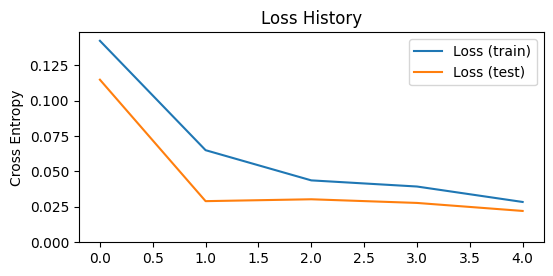

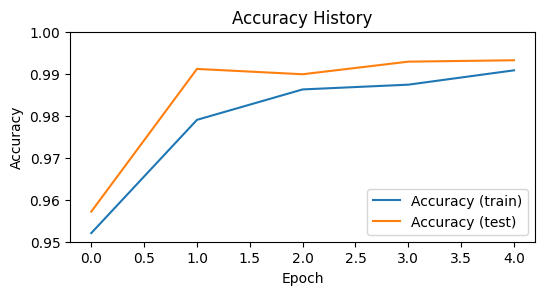

In [ ]:
plot_loss_curves(history_basic_cnn.history)

In [ ]:
img_pth, lbl, y, y_pr, y_hat = get_prediction(basic_cnn_model, data_test)

469/469 [==============================] - 31s 66ms/step


In [ ]:
show_classification_summary(y, y_hat, lbl)

              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      3000
     Basmati       0.99      1.00      0.99      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.99      0.99      0.99      3000
   Karacadag       0.99      0.99      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
show_confusion_matrix(y, y_hat, lbl)

predicted,Arborio,Basmati,Ipsala,Jasmine,Karacadag
actual,,,,,
Arborio,2966,0,0,6,28
Basmati,0,2990,0,10,0
Ipsala,0,1,2999,0,0
Jasmine,8,29,0,2963,0
Karacadag,20,0,0,0,2980


In [ ]:
basic_cnn_acc = metrics.accuracy_score(y, y_hat)
print(basic_cnn_acc)

0.9932


In [ ]:
results.append({"Model": "Basic CNN", "Accuracy": basic_cnn_acc})

####CNN with Transfer Learning (Fifth Model)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
N_CLASSES = data_train.num_classes

base_model = MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
)
base_model.trainable = False

inputs = Input(shape=IMG_SHAPE)
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.2)(x)
outputs = Dense(units=N_CLASSES, activation="softmax")(x)

cnn_tl = Model(inputs=inputs, outputs=outputs)

In [ ]:
set_seed(SEED)
LEARNING_RATE = 0.001
EPOCHS = 5

cnn_tl.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

cnn_tl_history = cnn_tl.fit(
    data_train,
    epochs=EPOCHS,
    steps_per_epoch=len(data_train),
    validation_data=data_test,
    validation_steps=len(data_test),
)

Epoch 1/5
1875/1875 [==============================] - 180s 94ms/step - loss: 0.1020 - accuracy: 0.9689 - val_loss: 0.0461 - val_accuracy: 0.9853
Epoch 2/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 4/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0391 - accuracy: 0.9870 - val_loss: 0.0348 - val_accuracy: 0.9898


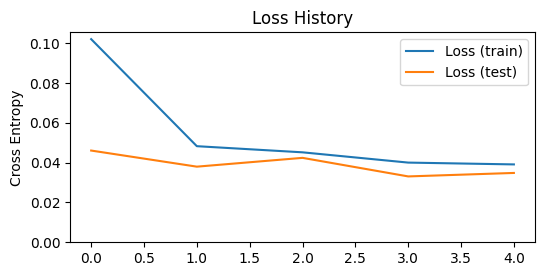

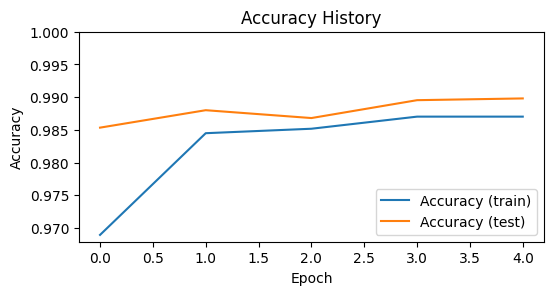

In [ ]:
plot_loss_curves(cnn_tl_history.history)

In [ ]:
img_pth, lbl, y, y_pr, y_hat = get_prediction(cnn_tl, data_test)

469/469 [==============================] - 36s 74ms/step


In [ ]:
show_classification_summary(y, y_hat, lbl)

              precision    recall  f1-score   support

     Arborio       1.00      0.98      0.99      3000
     Basmati       1.00      0.98      0.99      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.98      0.99      0.99      3000
   Karacadag       0.98      1.00      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
show_confusion_matrix(y, y_hat, lbl)

predicted,Arborio,Basmati,Ipsala,Jasmine,Karacadag
actual,,,,,
Arborio,2926,0,2,14,58
Basmati,0,2951,0,49,0
Ipsala,1,0,2997,2,0
Jasmine,0,10,2,2985,3
Karacadag,12,0,0,0,2988


In [ ]:
cnn_with_tl_acc = metrics.accuracy_score(y, y_hat)
print(cnn_with_tl_acc)

0.9898


In [ ]:
results.append({"Model": "CNN with Transfer Learning", "Accuracy": cnn_with_tl_acc})

####CNN with Transfer Learning and Fine-Tuning (Sixth Model)

In [ ]:
FINE_TUNE_AT = 120

base_model = cnn_tl.layers[1]
base_model.trainable = True

for layer in base_model.layers[:FINE_TUNE_AT]:
    layer.trainable = True

cnn_tl.compile(
    optimizer=Adam(learning_rate=0.01*LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
set_seed(SEED)

cnn_tr_ft_history = cnn_tl.fit(
    data_train,
    epochs=EPOCHS*2-1,
    initial_epoch=cnn_tl_history.epoch[-1],
    steps_per_epoch=len(data_train),
    validation_data=data_test,
    validation_steps=len(data_test),
)

Epoch 5/9
1875/1875 [==============================] - 321s 155ms/step - loss: 0.2338 - accuracy: 0.9533 - val_loss: 1.2702 - val_accuracy: 0.7500
Epoch 6/9
1875/1875 [==============================] - 286s 152ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.1053 - val_accuracy: 0.9697
Epoch 7/9
1875/1875 [==============================] - 290s 155ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0111 - val_accuracy: 0.9965
Epoch 8/9
1875/1875 [==============================] - 279s 149ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0087 - val_accuracy: 0.9973
Epoch 9/9
1875/1875 [==============================] - 280s 149ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0090 - val_accuracy: 0.9973


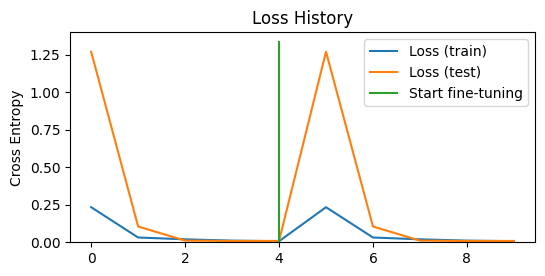

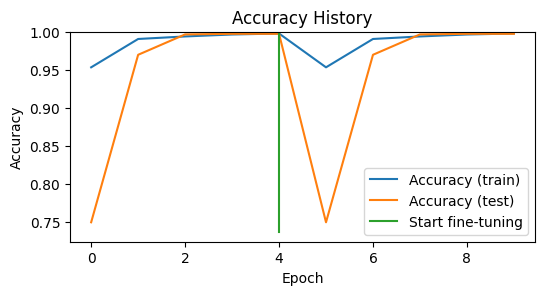

In [ ]:
hist = {}
for k in cnn_tr_ft_history.history.keys():
    hist[k] = cnn_tr_ft_history.history[k] + cnn_tr_ft_history.history[k]

plot_loss_curves(hist, EPOCHS)

In [ ]:
img_pth, lbl, y, y_pr, y_hat = get_prediction(cnn_tl, data_test)

469/469 [==============================] - 37s 77ms/step


In [ ]:
show_classification_summary(y, y_hat, lbl)

              precision    recall  f1-score   support

     Arborio       0.99      1.00      1.00      3000
     Basmati       1.00      1.00      1.00      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       1.00      0.99      1.00      3000
   Karacadag       1.00      0.99      1.00      3000

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [ ]:
show_confusion_matrix(y, y_hat, lbl)

predicted,Arborio,Basmati,Ipsala,Jasmine,Karacadag
actual,,,,,
Arborio,2993,0,2,5,0
Basmati,0,3000,0,0,0
Ipsala,0,0,3000,0,0
Jasmine,3,13,0,2983,1
Karacadag,17,0,0,0,2983


In [ ]:
cnn_with_tl_ft_acc = metrics.accuracy_score(y, y_hat)
print(cnn_with_tl_ft_acc)

0.9972666666666666


In [ ]:
results.append({"Model": "CNN with Transfer Learning and Fine-Tuning", "Accuracy": cnn_with_tl_ft_acc})

In [ ]:
dl_acc_df = pd.DataFrame(results)
ml_acc_df = pd.read_excel("ml_acc.xlsx")
all_acc = dl_acc_df.append(ml_acc_df)
all_acc.to_excel("all_acc.xlsx")

<ipython-input-43-35e32ca01ece>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_acc = acc_df.append(ml_acc)


### Find the Best Model

We are using the accuracy metric to evaluate the best model. One of the main reasons to use accuracy to evaluate the performance is because our dataset is balanced.

In [ ]:
all_acc = pd.read_excel("/content/all_acc.xlsx")
all_acc

,Model,Accuracy
0,CNN with Transfer Learning and Fine-Tuning,0.997267
1,Basic CNN,0.993200
2,Random Forest,0.992667
3,Logistic Regression,0.990333
4,CNN with Transfer Learning,0.989800
5,KNN,0.977733


Based on the above table, the best model is CNN with transfer learning and fine-tuning technique.

In [ ]:
# serialize model to JSON
model_json = cnn_tl.to_json()
with open("best_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn_tl.save_weights("best_model.h5")
print("Saved model to disk")

Saved model to disk


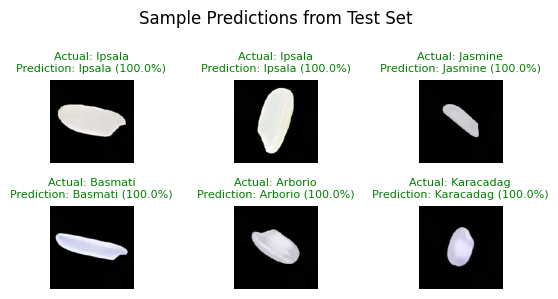

In [ ]:
view_random_predictions("Sample Predictions from Test Set", img_pth)

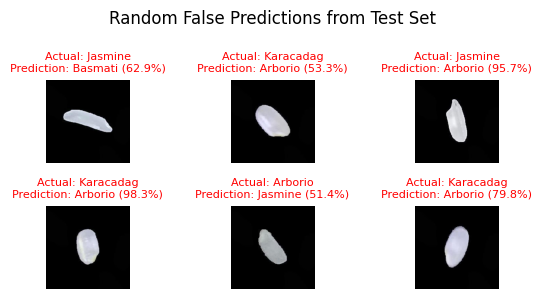

In [ ]:
view_random_false_predictions("Random False Predictions from Test Set", img_pth)

In [ ]:
cnn_tl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 2,230,277
Non-train

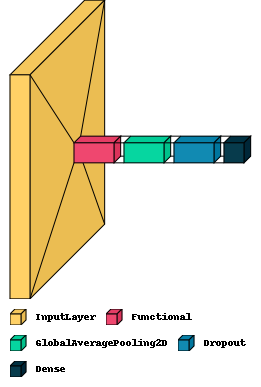

In [ ]:
import visualkeras
visualkeras.layered_view(cnn_tl, legend=True, scale_xy=1, scale_z=2, max_z=40)


## Rice Quality Check

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_classificaton(ratio):
	ratio =round(ratio,1)
	toret=""
	if(ratio>=3):
		toret="Slender"
	elif(ratio>=2.1 and ratio<3):
		toret="Medium"
	elif(ratio>=1.1 and ratio<2.1):
		toret="Bold"
	elif(ratio<=1):
		toret="Round"
	toret="("+toret+")"
	return toret


def rice_quality_check(img):
  img = cv2.imread(img,0)
  ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.float32)/9
  dst = cv2.filter2D(binary,-1,kernel)
  kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  erosion = cv2.erode(dst,kernel2,iterations = 1)
  dilation = cv2.dilate(erosion,kernel2,iterations = 1)
  edges = cv2.Canny(dilation,100,200)

  contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  print ("No. of rice grains=",len(contours))
  total_ar=0
  for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
      aspect_ratio=1/aspect_ratio
    print( round(aspect_ratio,2),get_classificaton(aspect_ratio))
    total_ar+=aspect_ratio
  avg_ar=total_ar/len(contours)
  print( "Average Aspect Ratio=",round(avg_ar,2),get_classificaton(avg_ar))

  imgs_row=2
  imgs_col=3
  plt.subplot(imgs_row,imgs_col,1),plt.imshow(img,'gray')
  plt.title("Original image")

  plt.subplot(imgs_row,imgs_col,2),plt.imshow(binary,'gray')
  plt.title("Binary image")

  plt.subplot(imgs_row,imgs_col,3),plt.imshow(dst,'gray')
  plt.title("Filtered image")

  plt.subplot(imgs_row,imgs_col,4),plt.imshow(erosion,'gray')
  plt.title("Eroded image")

  plt.subplot(imgs_row,imgs_col,5),plt.imshow(dilation,'gray')
  plt.title("Dialated image")

  plt.subplot(imgs_row,imgs_col,6),plt.imshow(edges,'gray')
  plt.title("Edge detect")

  plt.show()




#Predict the Rice Type and Check the Quality

In [ ]:
# load json and create model
json_file = open('best_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
def get_image(pth, img_size=(224, 224)):
    img = load_img(pth, target_size=img_size)
    img = img_to_array(img) / 255.

    return img

1/1 [==============================] - 11s 11s/step


Rice Variety Classification
Prediction: Ipsala (100.0%)


Rice Quality Check
No. of rice grains= 3
3.86 (Slender)
2.0 (Bold)
3.25 (Slender)
Average Aspect Ratio= 3.03 (Slender)


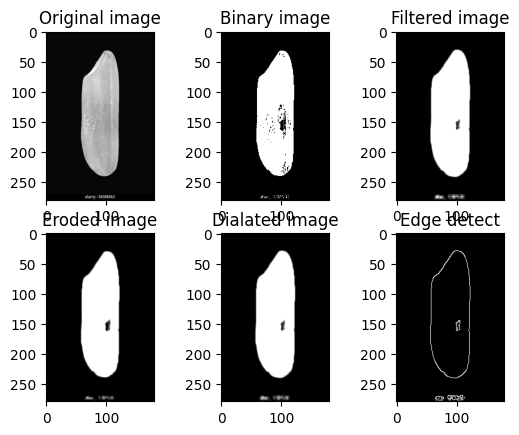

In [ ]:
IMG_SIZE = (224, 224)
pth = "/content/download (2).jfif"
lbl = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
img = get_image(pth, img_size=IMG_SIZE)
my_image = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
y_pr = loaded_model.predict(my_image)
y_hat = np.argmax(y_pr, axis=1)
yi_hat = lbl[y_hat[0]]
yi_pr = y_pr[0].max()
tit_sub = f"Prediction: {yi_hat} ({yi_pr:.1%})"
print("\n")
print("Rice Variety Classification")
print(tit_sub)

print("\n")
print("Rice Quality Check")
rice_quality_check(pth)